In [1]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path = '/media/capstone/HDD2/source_data/MozillaCV/en/validated.tsv'

In [3]:
en_data = pd.read_table(path)[['path', 'accents']]

In [4]:
durations = []

In [ ]:
for audio in tqdm(en_data['path']):
    data, samplerate = sf.read(os.path.join('/media/capstone/HDD2/source_data/MozillaCV/en/clips', f'{audio[:-3]}wav', ))
    duration = data.shape[0] / samplerate
    durations.append(duration)

 87%|█████████████████████████    | 1399569/1617877 [1:31:43<1:25:01, 42.79it/s]

In [27]:
bins = np.arange(0, 10, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
       3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
       7.8, 8.1, 8.4, 8.7, 9. , 9.3, 9.6, 9.9])

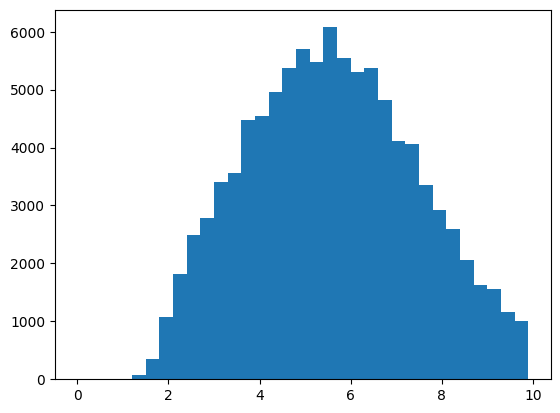

In [28]:
plt.hist(durations, bins=bins);
# plt.savefig('hist.png')

In [8]:
accent_data = en_data[en_data['accents'].notnull()]

In [13]:
accent_data.groupby(['accents']).count().sort_values(by='path', ascending=False)

,path
accents,
United States English,389397
England English,134595
"India and South Asia (India, Pakistan, Sri Lanka)",101067
Canadian English,61132
Australian English,51593
...,...
Non-native,1
Polish English,1
"United States English,California",1


In [14]:
accent_data.groupby(['accents']).count().sort_values(by='path', ascending=False).to_csv('accents_csv')